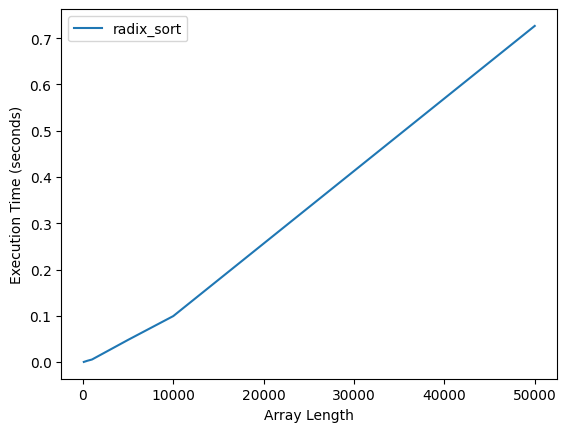

In [20]:
import time
import random
import matplotlib.pyplot as plt

def bubble_sort(arr):
    i = 0
    j = len(arr)-1

    while j>1:
        for i in range(j):
                if arr[i]>arr[i+1]:
                    arr[i],arr[i+1]=arr[i+1],arr[i]
        j-=1
    return arr

def insertion_sort(arr):
    for i in range(1,len(arr)):
        j = i
        while arr[j-1] > arr[j] and j > 0:
            arr[j-1], arr[j] = arr[j], arr[j-1]
            j -= 1
    return arr

def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m
 
    # create temp arrays
    L = [0] * (n1)
    R = [0] * (n2)
 
    # Copy data to temp arrays L[] and R[]
    for i in range(0, n1):
        L[i] = arr[l + i]
 
    for j in range(0, n2):
        R[j] = arr[m + 1 + j]
 
    # Merge the temp arrays back into arr[l..r]
    i = 0     # Initial index of first subarray
    j = 0     # Initial index of second subarray
    k = l     # Initial index of merged subarray
 
    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1
 
    # Copy the remaining elements of L[], if there
    # are any
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1
 
    # Copy the remaining elements of R[], if there
    # are any
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1
 
# l is for left index and r is right index of the
# sub-array of arr to be sorted
def mergeSort(arr, l, r):
    if l < r:

        # Same as (l+r)//2, but avoids overflow for
        # large l and h
        m = (l+r)//2

        # Sort first and second halves
        mergeSort(arr, l, m)
        mergeSort(arr, m+1, r)
        merge(arr, l, m, r)

    return arr

def mergeSortA(arr):
    beginning = 0
    end = len(arr)-1
    mergeSort(arr,beginning, end) 
    return arr

def Quick_Sort(arr):
    beginning = 0
    end = len(arr)-1
    quick_sort(arr,beginning, end) 
    return arr

def quick_sort(arr, low, high):
    if low < high:
        j = partition(arr, low, high)

        quick_sort(arr,low, j-1)
        quick_sort(arr,j+1, high)
    
    return arr
   
def partition(arr, low, high):
    
    pivot_value = arr[high]
    j = low-1

    for i in range(low,high+1):
        if arr[i]>pivot_value:
            pass
        if arr[i]<=pivot_value:
            j+=1
            if arr[i]<arr[j]:
                arr[i],arr[j]=arr[j],arr[i]

    return j

def countingSort(array, place):
    size = len(array)
    output = [0] * size
    count = [0] * 10

    # Calculate count of elements
    for i in range(0, size):
        index = array[i] // place
        count[index % 10] += 1

    # Calculate cumulative count
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Place the elements in sorted order
    i = size - 1
    while i >= 0:
        index = array[i] // place
        output[count[index % 10] - 1] = array[i]
        count[index % 10] -= 1
        i -= 1

    for i in range(0, size):
        array[i] = output[i]


# Main function to implement radix sort
def radixSort(array):
    # Get maximum element
    max_element = max(array)

    # Apply counting sort to sort elements based on place value.
    place = 1
    while max_element // place > 0:
        countingSort(array, place)
        place *= 10

algorithms= {
  "bubble_sort": bubble_sort,
  "insertion_sort": insertion_sort,
  "merge_sort": mergeSortA,
  "quick_sort": Quick_Sort,
  "radix_sort": radixSort
  
}

algo= {
  "radix_sort": radixSort
  
}



# Function to plot the performance of sorting algorithms
def plot_sorting_performance(algorithms):
    # Define the lengths of arrays for performance testing
    lengths = [100, 500, 1_000, 5_000, 10_000, 50_000]
    for algo_name, algo_func in algorithms.items():
        execution_times = []
        for length in lengths:
            arr = random.choices(range(length**3), k=length)
            start_time = time.time()
            algo_func(arr)
            end_time = time.time()
            execution_times.append(end_time - start_time)

        # Plot the execution times for each array length
        plt.plot(lengths, execution_times, label=algo_name)

    plt.xlabel("Array Length")
    plt.ylabel("Execution Time (seconds)")
    plt.legend()
    plt.show()

plot_sorting_performance(algorithms)
